In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Présentation et description des données



## statistiques descriptives des données disponibles

### Statistiques descriptives basiques

In [2]:
n_sex=pd.read_csv('firstname_with_sex.csv',sep=';')
n_sex.head()

,firstname,male,female
0,marie,10145,2390322
1,jean,1869615,6476
2,pierre,1475841,5047
3,jeanne,1765,1097397
4,françois,1089009,5951


In [3]:
n_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6946 entries, 0 to 6945
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstname  6946 non-null   object
 1   male       6946 non-null   int64 
 2   female     6946 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 162.9+ KB


In [4]:
t_sex=pd.read_csv('transcriptions_with_sex.csv')
t_sex.head()

,subject_line,groundtruth,prediction,sex
0,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,femme
1,338496f5-e4ca-43ac-aa5c-429cb3f6ac00,surname: Lhopital firstname: Louis-Jean occupa...,nom: Lhopital prénom: Louis Jean date_naissanc...,homme
2,e6a279da-9b6f-4f49-b498-64857bc50d1e,surname: Papin firstname: Marie occupation: id...,nom: Pyrin prénom: Marie date_naissance: 55 re...,femme
3,7534deca-39e8-4f00-be17-c12460015de1,surname: Lavocat firstname: Marie link: femme ...,nom: Lavocat prénom: Marie date_naissance: 187...,femme
4,ef334a66-a504-418a-9872-e7c9db923488,surname: Benne firstname: Marguerite age: 78,nom: Benne prénom: Marguerite date_naissance: ...,femme


In [5]:
n_sex.describe()

,male,female
count,6.946000e+03,6.946000e+03
mean,2.084710e+03,1.795356e+03
std,3.725168e+04,3.738858e+04
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,1.100000e+01,1.200000e+01
75%,4.000000e+01,4.300000e+01
max,1.869615e+06,2.390322e+06


In [6]:
n_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6946 entries, 0 to 6945
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   firstname  6946 non-null   object
 1   male       6946 non-null   int64 
 2   female     6946 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 162.9+ KB


In [7]:
t_sex.describe()

,subject_line,groundtruth,prediction,sex
count,241,241,241,241
unique,241,241,241,3
top,ebb26ada-044c-4c62-9dbc-a9c8d505d31c,surname: Chardon firstname: Marie occupation: ...,nom: Chardon prénom: Marie date_naissance: 30 ...,homme
freq,1,1,1,125


In [8]:
t_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_line  241 non-null    object
 1   groundtruth   241 non-null    object
 2   prediction    241 non-null    object
 3   sex           241 non-null    object
dtypes: object(4)
memory usage: 7.7+ KB


Il n'y a aucune valeur nulle donc ça nous enlève une partie du pré-processing

### Visualisation 

In [9]:
for i in range(len(t_sex))[:4]:
    print(t_sex.groundtruth[i],'\n',t_sex.prediction[i],'\n')



surname: Chardon firstname: Marie occupation: idem link: fille age: 30  
 nom: Chardon prénom: Marie date_naissance: 30 lieux_naissance: "  

surname: Lhopital firstname: Louis-Jean occupation: sp link: chef age: 67  
 nom: Lhopital prénom: Louis Jean date_naissance: 67 lieux_naissance: Sn employeur: ahef  

surname: Papin firstname: Marie occupation: idem link: idem employer: idem age: 15  
 nom: Pyrin prénom: Marie date_naissance: 55 relation: d  

surname: Lavocat firstname: Marie link: femme birth_date: 1875 lob: Rigny  
 nom: Lavocat prénom: Marie date_naissance: 1875 lieux_naissance: Rigny profession: ''  



On se rends compte que notre variable explicative 'groundtruth' possède des informations trop fortes sur le sexe comme "link" qui peut prendre les valeurs "femme","garçon" ou encore "fille". Il s'agira d'extraire ces informations pour éviter un over-fitting du modèle.

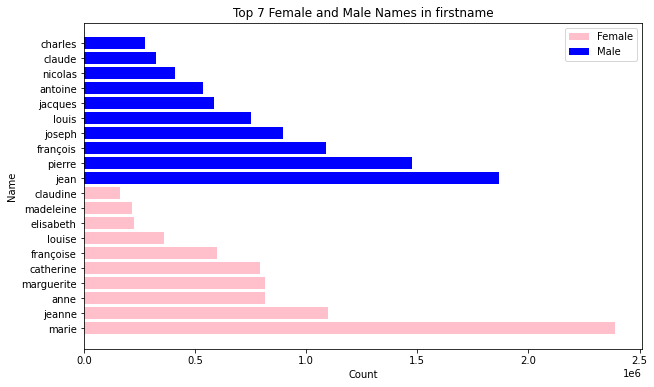

In [10]:
import matplotlib.pyplot as plt

# Assuming you have already calculated female_index and male_index
female_index = n_sex['female'].nlargest(10).index
male_index = n_sex['male'].nlargest(10).index

# Assuming you already have a DataFrame with 'firstname' as index
females = list(n_sex.loc[female_index]['firstname'])
males = list(n_sex.loc[male_index]['firstname'])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.barh(females, n_sex.loc[female_index]['female'], color='pink', label='Female')
plt.barh(males, n_sex.loc[male_index]['male'], color='blue', label='Male')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 7 Female and Male Names in firstname')
plt.legend()
plt.savefig('sex_name_plot1.png')
# Displaying the plot
plt.show()


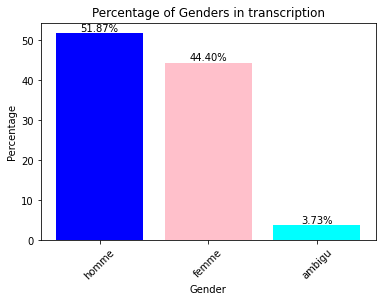

In [11]:
gender_frequency = t_sex['sex'].value_counts()

# Calculating the percentage of each gender
gender_percentage = (gender_frequency / gender_frequency.sum()) * 100

# Plotting the bar plot
plt.bar(gender_percentage.index, gender_percentage.values, color=['blue', 'pink','cyan'])

# Adding percentage annotations to the bars
for i, percentage in enumerate(gender_percentage):
    plt.annotate(f'{percentage:.2f}%', xy=(i, percentage), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Genders in transcription')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('percentage_t_sex_plot1.png')
# Displaying the plot
plt.show()

## Preprocessing 

la cellule suivante transforme la variable groundtruth en enlevant les informations trop fortes présentes dans la sous-section "link"

In [12]:
import pandas as pd

# Function to modify each sentence
def modify_sentence(sentence):
    # Find the index of "link" in the sentence
    index_link = sentence.find("link")

    if index_link != -1:  # If "link" is found
        # Find the index of "employer" after the index of "link"
        index_employer = sentence.find("employer", index_link)

        # Find the index of "age" after the index of "link"
        index_age = sentence.find("age", index_link)

        # Determine the end index based on the presence of "employer" or "age"
        if index_employer != -1 and (index_age == -1 or index_employer < index_age):  # If "employer" is found
            end_index = index_employer  # Exclude "employer" from the removed portion
        elif index_age != -1:  # If "employer" is not found but "age" is found
            end_index = index_age  # Exclude "age" from the removed portion
        else:  # If neither "employer" nor "age" is found
            # Keep the portion until the end of the sentence
            end_index = len(sentence)

        # Remove the portion from "link" to "employer" or "age" excluding "link"
        modified_sentence = sentence[:index_link] + sentence[end_index:]
        return modified_sentence
    else:
        return sentence

# Apply the function to each row in the DataFrame
X = t_sex['groundtruth'].apply(modify_sentence)

X.iloc[2]

'surname: Papin firstname: Marie occupation: idem employer: idem age: 15 '

# Basic classifications 

Training and evaluating SVC
Accuracy: 0.9183673469387755


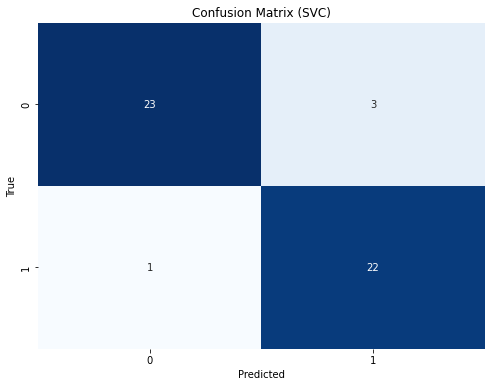


Training and evaluating RandomForestClassifier
Accuracy: 0.7755102040816326


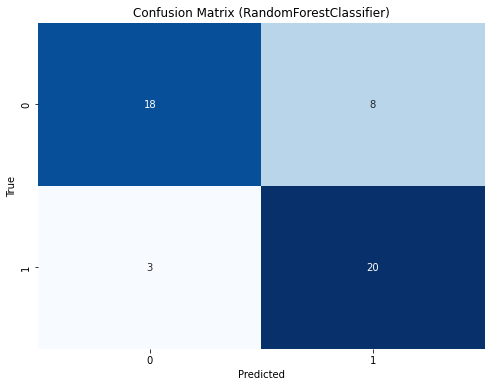

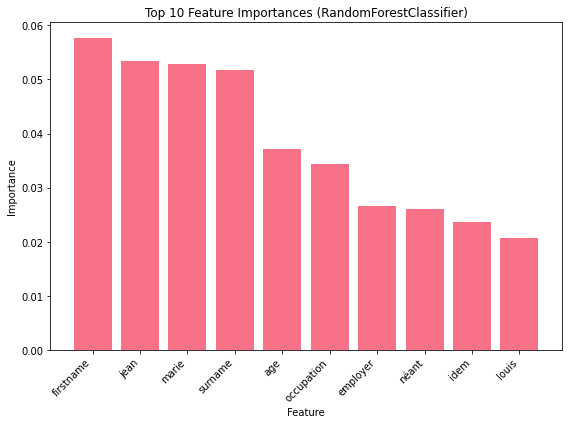


Training and evaluating XGBClassifier
Accuracy: 0.6938775510204082


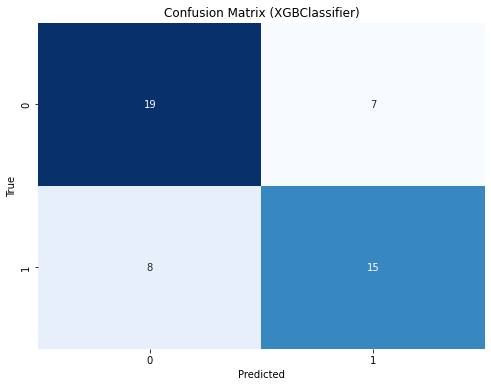

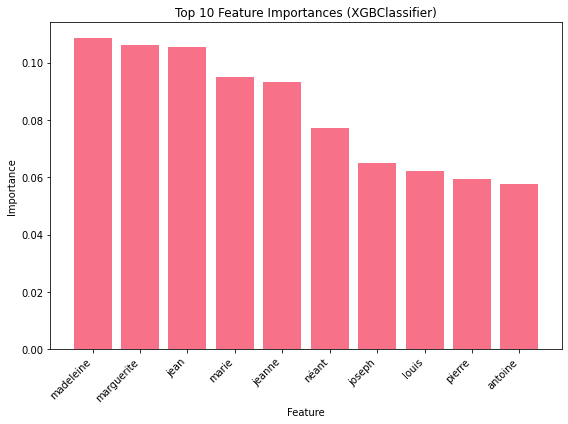


Training and evaluating CatBoostClassifier
Learning rate set to 0.004989
0:	learn: 0.6909646	total: 61.3ms	remaining: 1m 1s
1:	learn: 0.6895136	total: 63.2ms	remaining: 31.5s
2:	learn: 0.6872443	total: 64.4ms	remaining: 21.4s
3:	learn: 0.6851295	total: 65.7ms	remaining: 16.4s
4:	learn: 0.6832134	total: 66.9ms	remaining: 13.3s
5:	learn: 0.6819971	total: 67.9ms	remaining: 11.3s
6:	learn: 0.6799883	total: 69ms	remaining: 9.79s
7:	learn: 0.6781276	total: 70.5ms	remaining: 8.74s
8:	learn: 0.6761742	total: 72.4ms	remaining: 7.97s
9:	learn: 0.6743020	total: 74.1ms	remaining: 7.33s
10:	learn: 0.6732266	total: 75.2ms	remaining: 6.76s
11:	learn: 0.6717072	total: 76.3ms	remaining: 6.28s
12:	learn: 0.6699633	total: 77.7ms	remaining: 5.9s
13:	learn: 0.6679422	total: 78.9ms	remaining: 5.56s
14:	learn: 0.6656865	total: 80.6ms	remaining: 5.29s
15:	learn: 0.6639031	total: 81.8ms	remaining: 5.03s
16:	learn: 0.6619422	total: 82.9ms	remaining: 4.79s
17:	learn: 0.6608299	total: 83.9ms	remaining: 4.58s
18:

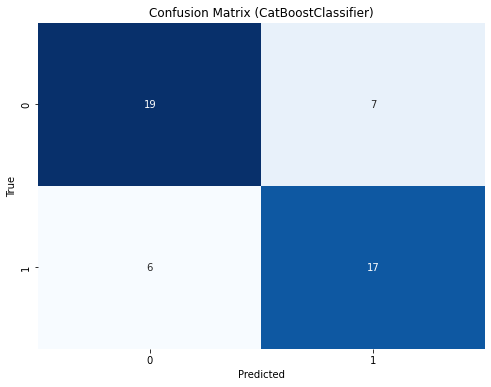

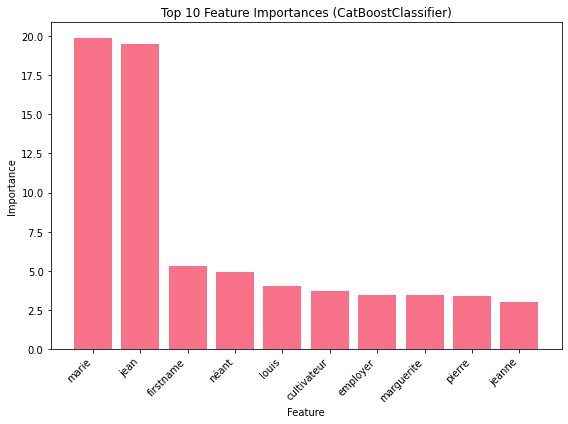

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

X = t_sex['groundtruth'].apply(modify_sentence)
target='sex'
feature='groundtruth'
y=t_sex[target]

def text_classification_pipeline(model, X, y):
    # Diviser les données en ensembles de formation et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_train_cleaned=y_train[y_train != 'ambigu']

    X_train_cleaned=X_train.loc[y_train_cleaned.index]
    y_test_cleaned=y_test[y_test != 'ambigu']

    X_test_cleaned=X_test.loc[y_test_cleaned.index]

    label_mapping = {'homme': 0, 'femme': 1,'ambigu':2}
    y_train = [label_mapping[label] for label in y_train_cleaned]
    y_test = [label_mapping[label] for label in y_test_cleaned]

    # Créer la pipeline
    text_clf = Pipeline([
        ('tfidf', TfidfVectorizer()),  # Vectorisation du texte
        ('clf', model)  # Classification avec le modèle spécifié
    ])
    
    # Entraîner le modèle
    text_clf.fit(X_train_cleaned, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = text_clf.predict(X_test_cleaned)
    
    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    custom_palette = sns.color_palette("husl", 5)
    sns.set_palette(custom_palette)
    # Afficher la matrice de confusion
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix ({model.__class__.__name__})')
    plt.show()
        
    # Afficher l'importance des fonctionnalités (si disponible)
    if hasattr(model, 'feature_importances_'):
        if isinstance(model, XGBClassifier):
            # XGBoost
            feature_importance = model.feature_importances_
        elif isinstance(model, RandomForestClassifier):
            # RandomForest
            feature_importance = model.feature_importances_
        elif isinstance(model, CatBoostClassifier):
            # CatBoost
            feature_importance = model.get_feature_importance()
        
        # Afficher l'importance des fonctionnalités
        feature_names = text_clf.named_steps['tfidf'].get_feature_names_out()
        sorted_idx = np.argsort(feature_importance)[::-1]
        top_features = 10
        plt.figure(figsize=(8, 6))
        plt.bar(range(top_features), feature_importance[sorted_idx][:top_features], align='center')
        plt.xticks(range(top_features), feature_names[sorted_idx][:top_features], rotation=45, ha='right')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Top {top_features} Feature Importances ({model.__class__.__name__})')
        plt.tight_layout()
        plt.show()
    sns.set_palette("Set2")
    return text_clf


# Modèles à tester
models = [SVC(), RandomForestClassifier(), XGBClassifier(), CatBoostClassifier()]

for model in models:
    print("Training and evaluating", model.__class__.__name__)
    text_classification_pipeline(model, X, y)
    print()



Les modèles traditionnelles de classification n'apportent pas grand chose sauf le SVC qui a quand même une belle accuracy. Cherchons à l'améliorer.

Dans la prochaine cellule, on utilile un multinomialNB() en enlevant les lignes où le sexe est marqué comme "ambigu". 

In [34]:
from sklearn.model_selection import train_test_split
X = t_sex['groundtruth'].apply(modify_sentence)
target='sex'
feature='groundtruth'
y=t_sex[target]
# Split the dataset, create X (features) and y (target), print the size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_cleaned=y_train[y_train != 'ambigu']

X_train_cleaned=X_train.loc[y_train_cleaned.index]
y_test_cleaned=y_test[y_test != 'ambigu']

X_test_cleaned=X_test.loc[y_test_cleaned.index]

label_mapping = {'homme': 0, 'femme': 1,'ambigu':2}
y_train = [label_mapping[label] for label in y_train_cleaned]
y_test = [label_mapping[label] for label in y_test_cleaned]

print("Training set size:", len(X_train_cleaned))
print("Test set size:", len(X_test_cleaned))

from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer()
# create the vectorizer object

# fit on train data
X_train_vectors = vectorizer.fit_transform(X_train_cleaned)

# apply it on train and dev data
X_test_vectors = vectorizer.transform(X_test_cleaned)

from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
clf = MultinomialNB()
# create the MultinomialNB

# Train 
clf.fit(X_train_vectors, y_train)

# Evaluate
accuracy = clf.score(X_test_vectors, y_test)
print("Accuracy:", accuracy)


Training set size: 183
Test set size: 49
Accuracy: 0.9387755102040817


On peut optimiser le modèle avec un meilleur alpha 

In [22]:

clf = MultinomialNB(alpha=0.5)
# create the MultinomialNB

# Train 
clf.fit(X_train_vectors, y_train)

# Evaluate
accuracy = clf.score(X_test_vectors, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9591836734693877


0.96 d'accuracy c'est super !

In [18]:
from sklearn.model_selection import train_test_split
X = t_sex['prediction'].apply(modify_sentence)
target='sex'
feature='prediction'
y=t_sex[target]
# Split the dataset, create X (features) and y (target), print the size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_cleaned=y_train[y_train != 'ambigu']

X_train_cleaned=X_train.loc[y_train_cleaned.index]
y_test_cleaned=y_test[y_test != 'ambigu']

X_test_cleaned=X_test.loc[y_test_cleaned.index]

label_mapping = {'homme': 0, 'femme': 1,'ambigu':2}
y_train = [label_mapping[label] for label in y_train_cleaned]
y_test = [label_mapping[label] for label in y_test_cleaned]

print("Training set size:", len(X_train_cleaned))
print("Test set size:", len(X_test_cleaned))

from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
vectorizer = CountVectorizer()
# create the vectorizer object

# fit on train data
X_train_vectors = vectorizer.fit_transform(X_train_cleaned)

# apply it on train and dev data
X_test_vectors = vectorizer.transform(X_test_cleaned)

from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
clf = MultinomialNB(alpha=0.5)
# create the MultinomialNB

# Train 
clf.fit(X_train_vectors, y_train)

# Evaluate
accuracy = clf.score(X_test_vectors, y_test)
print("Accuracy:", accuracy)


Training set size: 183
Test set size: 49
Accuracy: 0.8163265306122449


Le modèle marche beaucoup moins sur la variable "prediction" 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


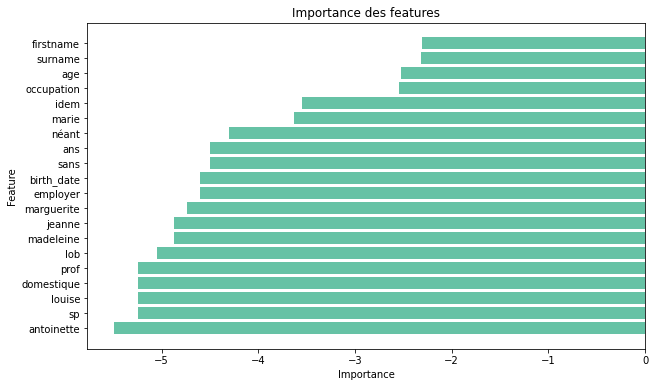

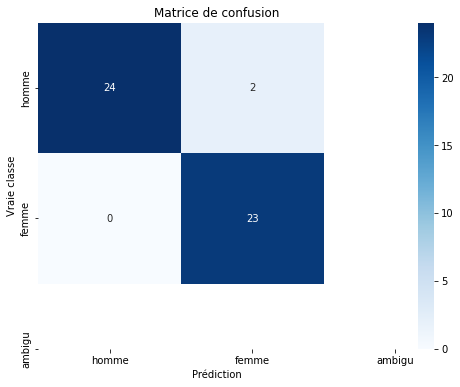

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotter l'importance des features
plt.figure(figsize=(10, 6))
feature_importances = clf.coef_[0]
feature_names = vectorizer.get_feature_names_out()
sorted_indices = feature_importances.argsort()
top_features = 20  # Nombre de features à afficher
plt.barh(range(top_features), feature_importances[sorted_indices[-top_features:]])
plt.yticks(range(top_features), [feature_names[i] for i in sorted_indices[-top_features:]])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des features')
plt.savefig('feature_importance.png')  # Enregistrer le graphique
plt.show()

# Plotter la matrice de confusion
y_pred = clf.predict(X_test_vectors)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.title('Matrice de confusion')
plt.savefig('confusion_matrix.png')  # Enregistrer le graphique
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd



# Split the dataset into training and testing sets

# Create a pipeline with TF-IDF vectorizer and SGDClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42))
])

# Train the model
pipeline.fit(X_train_cleaned, y_train)

# Make predictions
y_pred = pipeline.predict(X_test_cleaned)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8775510204081632


J'ai aussi essayé avec un Stochastic gradient descent classifier et ça me donne une bonne performance mais elle reste inférieur à ce qui a été vu avant 

## Fuzzy matching

Ici, on essaye d'utiliser du fuzzy matching pour tenter de prédire le sexe mais sans grand succès

In [24]:
pip install fuzzywuzzy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
from fuzzywuzzy import fuzz

import numpy as np

# Obtenir les poids (log-counts) des caractéristiques après l'entraînement
feature_log_probabilities = clf.feature_log_prob_

# Obtenir les noms des caractéristiques (mots)
feature_names = vectorizer.get_feature_names_out()

# Créer un dictionnaire avec les noms des caractéristiques et leurs poids
word_weights = {}
for i, class_label in enumerate(clf.classes_):
    word_weights[class_label] = {word: weight for word, weight in zip(feature_names, feature_log_probabilities[i])}

# Imprimer les mots les plus pertinents pour chaque classe
for class_label, word_weight_dict in word_weights.items():
    print("Classe:", class_label)
    sorted_words = sorted(word_weight_dict.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 mots
    for word, weight in sorted_words:
        print(word, ":", np.exp(weight))  # Convertir le poids log en probabilité
    print()

# Liste de mots-clés associés à chaque sexe
mots_cles_homme = list(pd.Series(word_weights[0]).nlargest(10).index)
mots_cles_femme = list(pd.Series(word_weights[1]).nlargest(10).index)

# Fonction pour attribuer le sexe en utilisant fuzzy matching
def attribuer_sexe(texte):
    score_homme = max(fuzz.partial_ratio(texte, mot) for mot in mots_cles_homme)
    score_femme = max(fuzz.partial_ratio(texte, mot) for mot in mots_cles_femme)
    
    if score_homme > score_femme:
        return 'Homme'
    elif score_femme > score_homme:
        return 'Femme'
    else:
        return 'Indéterminé'

# Attribution du sexe pour chaque texte
predictions=[]
for item in X_train_cleaned:
    predictions.append(attribuer_sexe(item))

accuracy_score(y_train,predictions)


Classe: 0
surname : 0.09191685912240184
firstname : 0.0909930715935335
occupation : 0.07898383371824484
age : 0.07344110854503465
employer : 0.027251732101616636
idem : 0.025404157043879914
jean : 0.021709006928406473
birth_date : 0.01616628175519631
lob : 0.014318706697459585
cultivateur : 0.010623556581986144

Classe: 1
firstname : 0.09923664122137404
surname : 0.09806224310041106
age : 0.08044627128596595
occupation : 0.07809747504403992
idem : 0.028772753963593665
marie : 0.02642395772166764
néant : 0.013505578391074573
ans : 0.011156782149148569
sans : 0.011156782149148569
birth_date : 0.009982384028185555



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

Les résultats sont évidemment médiocres car il faut trouver des mots-clés pertinents pour chaque sexe, ce qui est assez complexe à faire

## Bert Model

In [35]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Assuming X_train_cleaned and X_test_cleaned are DataFrames with a column named 'text'
# Extract the 'text' column and convert it to a list of strings
X_train_texts = X_train_cleaned.tolist()
X_test_texts = X_test_cleaned.tolist()

# Now X_train_texts and X_test_texts are lists of strings
# You can use them as inputs to the tokenizer
train_encodings = tokenizer(X_train_texts, truncation=True, padding=True)
test_encodings = tokenizer(X_test_texts, truncation=True, padding=True)



In [39]:
import torch

class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Define a label mapping
label_mapping = {'homme': 1, 'femme': 0}

# Convert string labels to numerical values for training dataset
y_train_numerical = [label_mapping[label] for label in y_train_cleaned]

# Convert string labels to numerical values for test dataset
y_test_numerical = [label_mapping[label] for label in y_test_cleaned]

# Create training and test datasets
train_dataset = IMDbDataset(train_encodings, y_train_numerical)
test_dataset = IMDbDataset(test_encodings, y_test_numerical)

In [47]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments


training_args = TrainingArguments(
    output_dir='./results',      # Specify the maximum number of training steps
    num_train_epochs=3,               # total number of training epochs
    per_device_train_batch_size=16,   # batch size per device during training
    per_device_eval_batch_size=64,    # batch size for evaluation
    warmup_steps=500,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.01,                # strength of weight decay
    logging_dir='./logs',             # directory for storing logs
    logging_steps=10,
)

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset            # evaluation dataset
)

trainer.train()
# Evaluate the model on the test dataset
results = trainer.evaluate(test_dataset)

# Print the evaluation results
print(results)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


  0%|          | 0/36 [00:00<?, ?it/s]

{'loss': 0.6932, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.83}
{'loss': 0.6937, 'learning_rate': 2.0000000000000003e-06, 'epoch': 1.67}
{'loss': 0.6921, 'learning_rate': 3e-06, 'epoch': 2.5}
{'train_runtime': 12.357, 'train_samples_per_second': 44.428, 'train_steps_per_second': 2.913, 'train_loss': 0.6929428974787394, 'epoch': 3.0}


  0%|          | 0/1 [00:00<?, ?it/s]

{'eval_loss': 0.6904267072677612, 'eval_runtime': 0.1659, 'eval_samples_per_second': 295.364, 'eval_steps_per_second': 6.028, 'epoch': 3.0}


In [48]:
from sklearn.metrics import accuracy_score

# Faire des prédictions sur l'ensemble de données de test
predictions = trainer.predict(test_dataset)

# Extraire les prédictions et les vraies étiquettes
predicted_labels = predictions.predictions.argmax(axis=1)
true_labels = test_dataset.labels

# Calculer la précision en comparant les prédictions aux vraies étiquettes
accuracy = accuracy_score(true_labels, predicted_labels)

print("Accuracy:", accuracy)

  0%|          | 0/1 [00:00<?, ?it/s]

Accuracy: 0.5306122448979592


Une accuracy très mauvaise 

# Full data

cette partie essayait d'adapter le modèle sur l'ensemble de corpus sans grand succès car il était difficile de récuperer les informations du fichier "entities.json"

In [42]:
import string

tous_les_caracteres = string.printable
tous_les_caracteres

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
import json

# Open the JSON file
with open('entities.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Now 'data' contains the contents of the JSON file
# You can access its elements like you would with any Python dictionary
print(data)